In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold = pd.read_csv("K:\DATA SCIENCE\DataSets\gold_price_data.csv")

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.shape

(2290, 6)

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold1 = gold.drop('Date',axis=1)

In [10]:
corrmap = gold1.corr()

<Axes: >

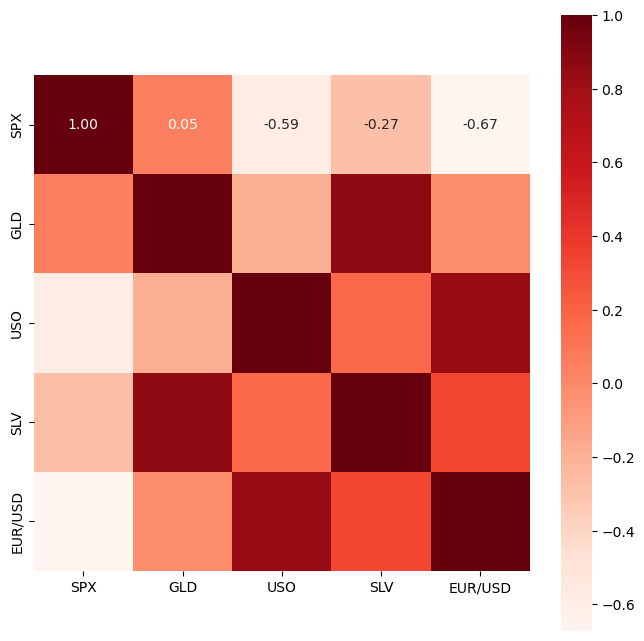

In [11]:
plt.figure(figsize= (8,8))
sns.heatmap(corrmap, annot = True, square= True, cbar= True, fmt='.2f', cmap= 'Reds')

In [25]:
corrmap['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Count'>

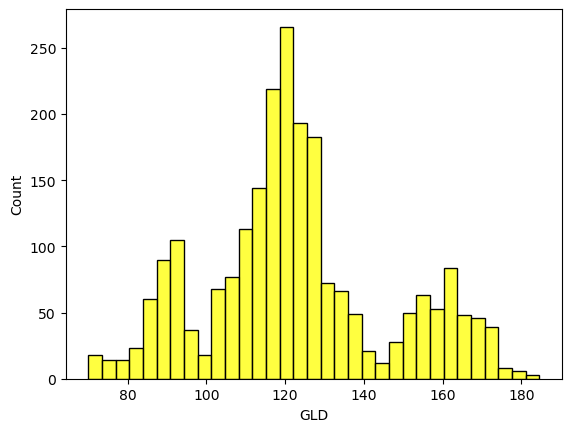

In [28]:
sns.histplot(gold['GLD'],color= "Yellow")

In [33]:
X = gold.drop(['Date','GLD'], axis=1)
Y = gold['GLD']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 2)

# Random Forest Regressor

In [35]:
randomReg = RandomForestRegressor()

In [36]:
randomReg.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
pred_randomReg = randomReg.predict(X_test)

In [39]:
#R2 Error
score = metrics.r2_score(Y_test, pred_randomReg)
print('R square Error:', score)

R square Error: 0.9894074489152994


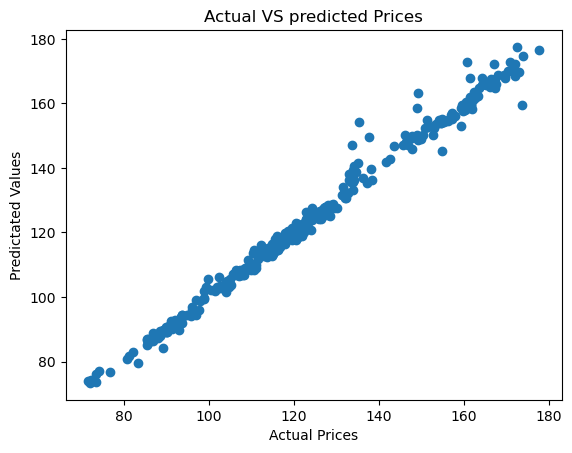

In [40]:
plt.scatter(Y_test, pred_randomReg)
plt.ylabel('Predictated Values')
plt.xlabel('Actual Prices')
plt.title('Actual VS predicted Prices')
plt.show()

As we can see it has accurately predicted the gold prices